# 1. Import libraries
import all the modules, functions and objects

In [122]:
# libraries
import pandas
import pylab
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ROCAUC

# 2. Load Dataset
We are goint to use the diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases.
We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.

In [123]:
dataset = pandas.read_csv('diabetes.csv')

In [124]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Summarize the Dataset
## 3.1 Dimensions of Dataset

In [125]:
# shape
print(dataset.shape)

(768, 9)


## 3.2 Peek at Data

In [126]:
# head
print(dataset.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

## 3.3 Statistical Summary

In [127]:
# descriptions
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Following columns or variables have an invalid zero value:
-Glucose
-BloodPressure
-SkinThickness
-Insulin
-BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [128]:
diabetes_data_copy = dataset.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())
diabetes_data_copy.head()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Aiming to impute nan values for the columns in accordance with their distribution

In [129]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## 3.4 Outcome Distribution

In [130]:
# outcome distribution
print(diabetes_data_copy.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


# 4. Data visualization
## 4.1 Univariate Plots

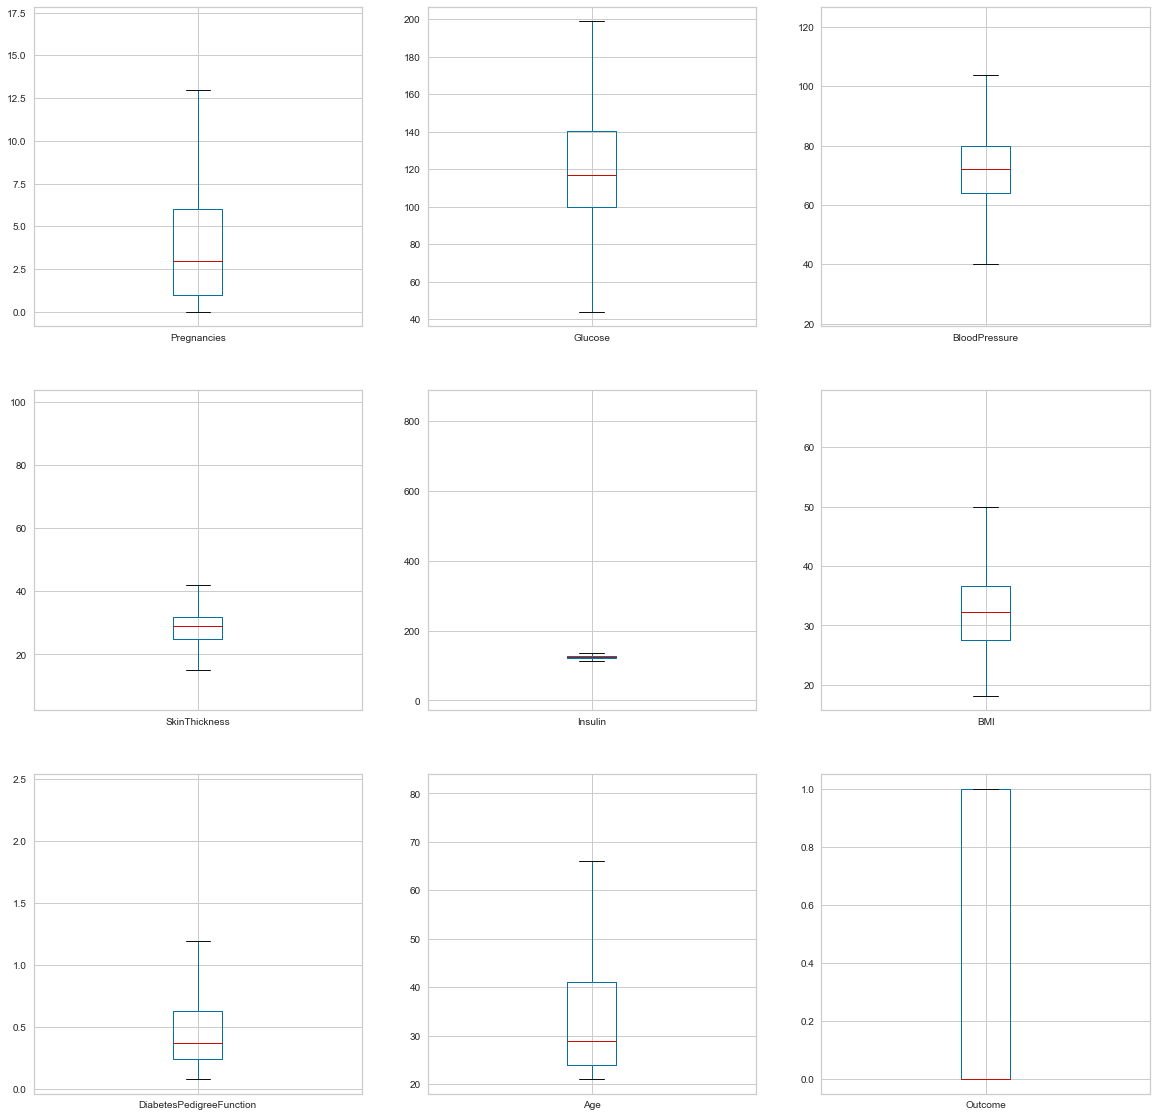

In [131]:
#adjust figure size first
pylab.rcParams['figure.figsize'] = (20, 20)
diabetes_data_copy.plot(kind='box', subplots=True,layout=(3,3))
plt.show()

we can also use histogram 

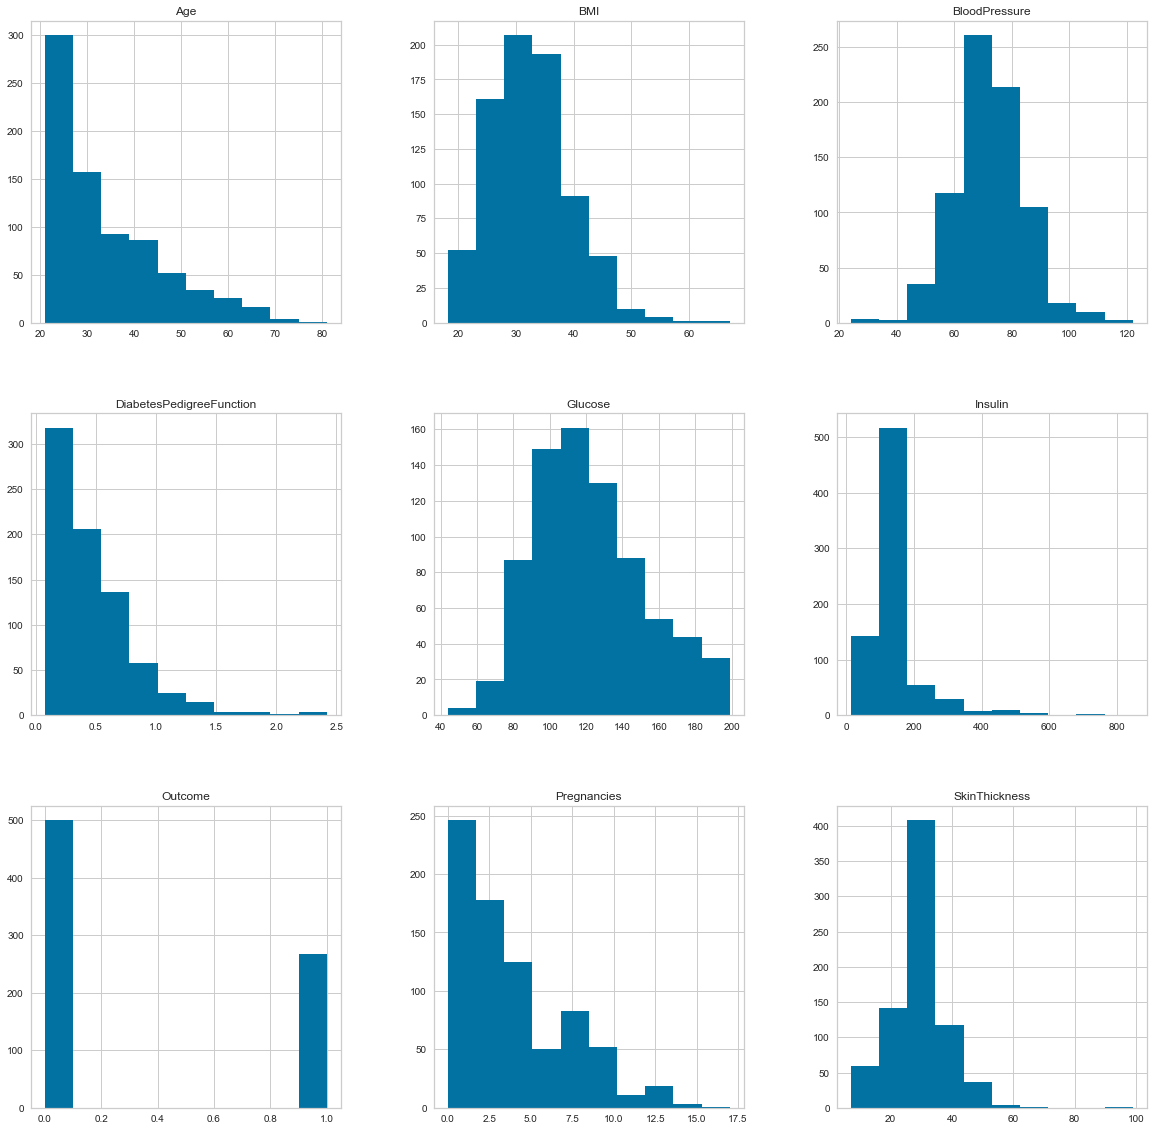

In [132]:
#histograms
diabetes_data_copy.hist()
plt.show()

It looks like perhaps three of the input variables(BMI, BloodPressure and Glucose) have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

## 4.2 Multivariate Plots
First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

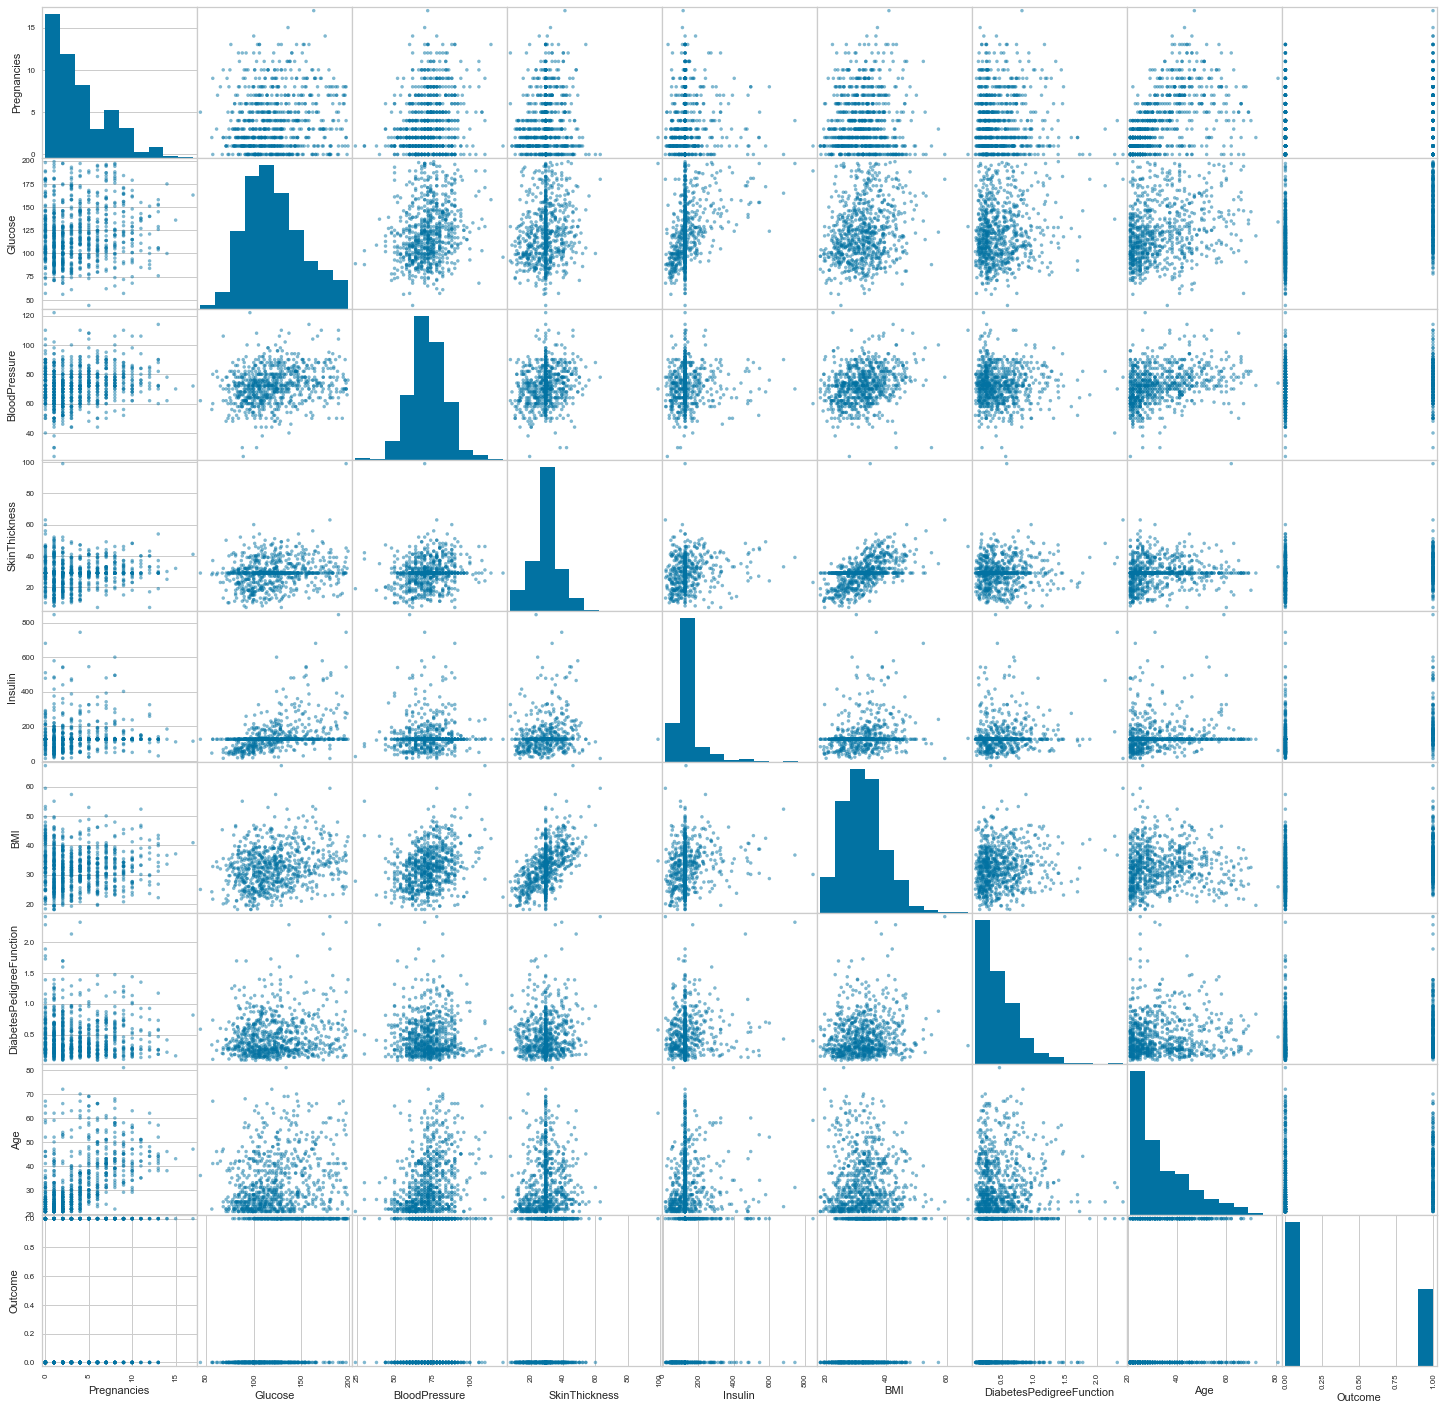

In [133]:
# scatter plot matrix
pylab.rcParams['figure.figsize'] = (25, 25)
scatter_matrix(diabetes_data_copy)
plt.show()


Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

## 4.3 Pair plot for clean data

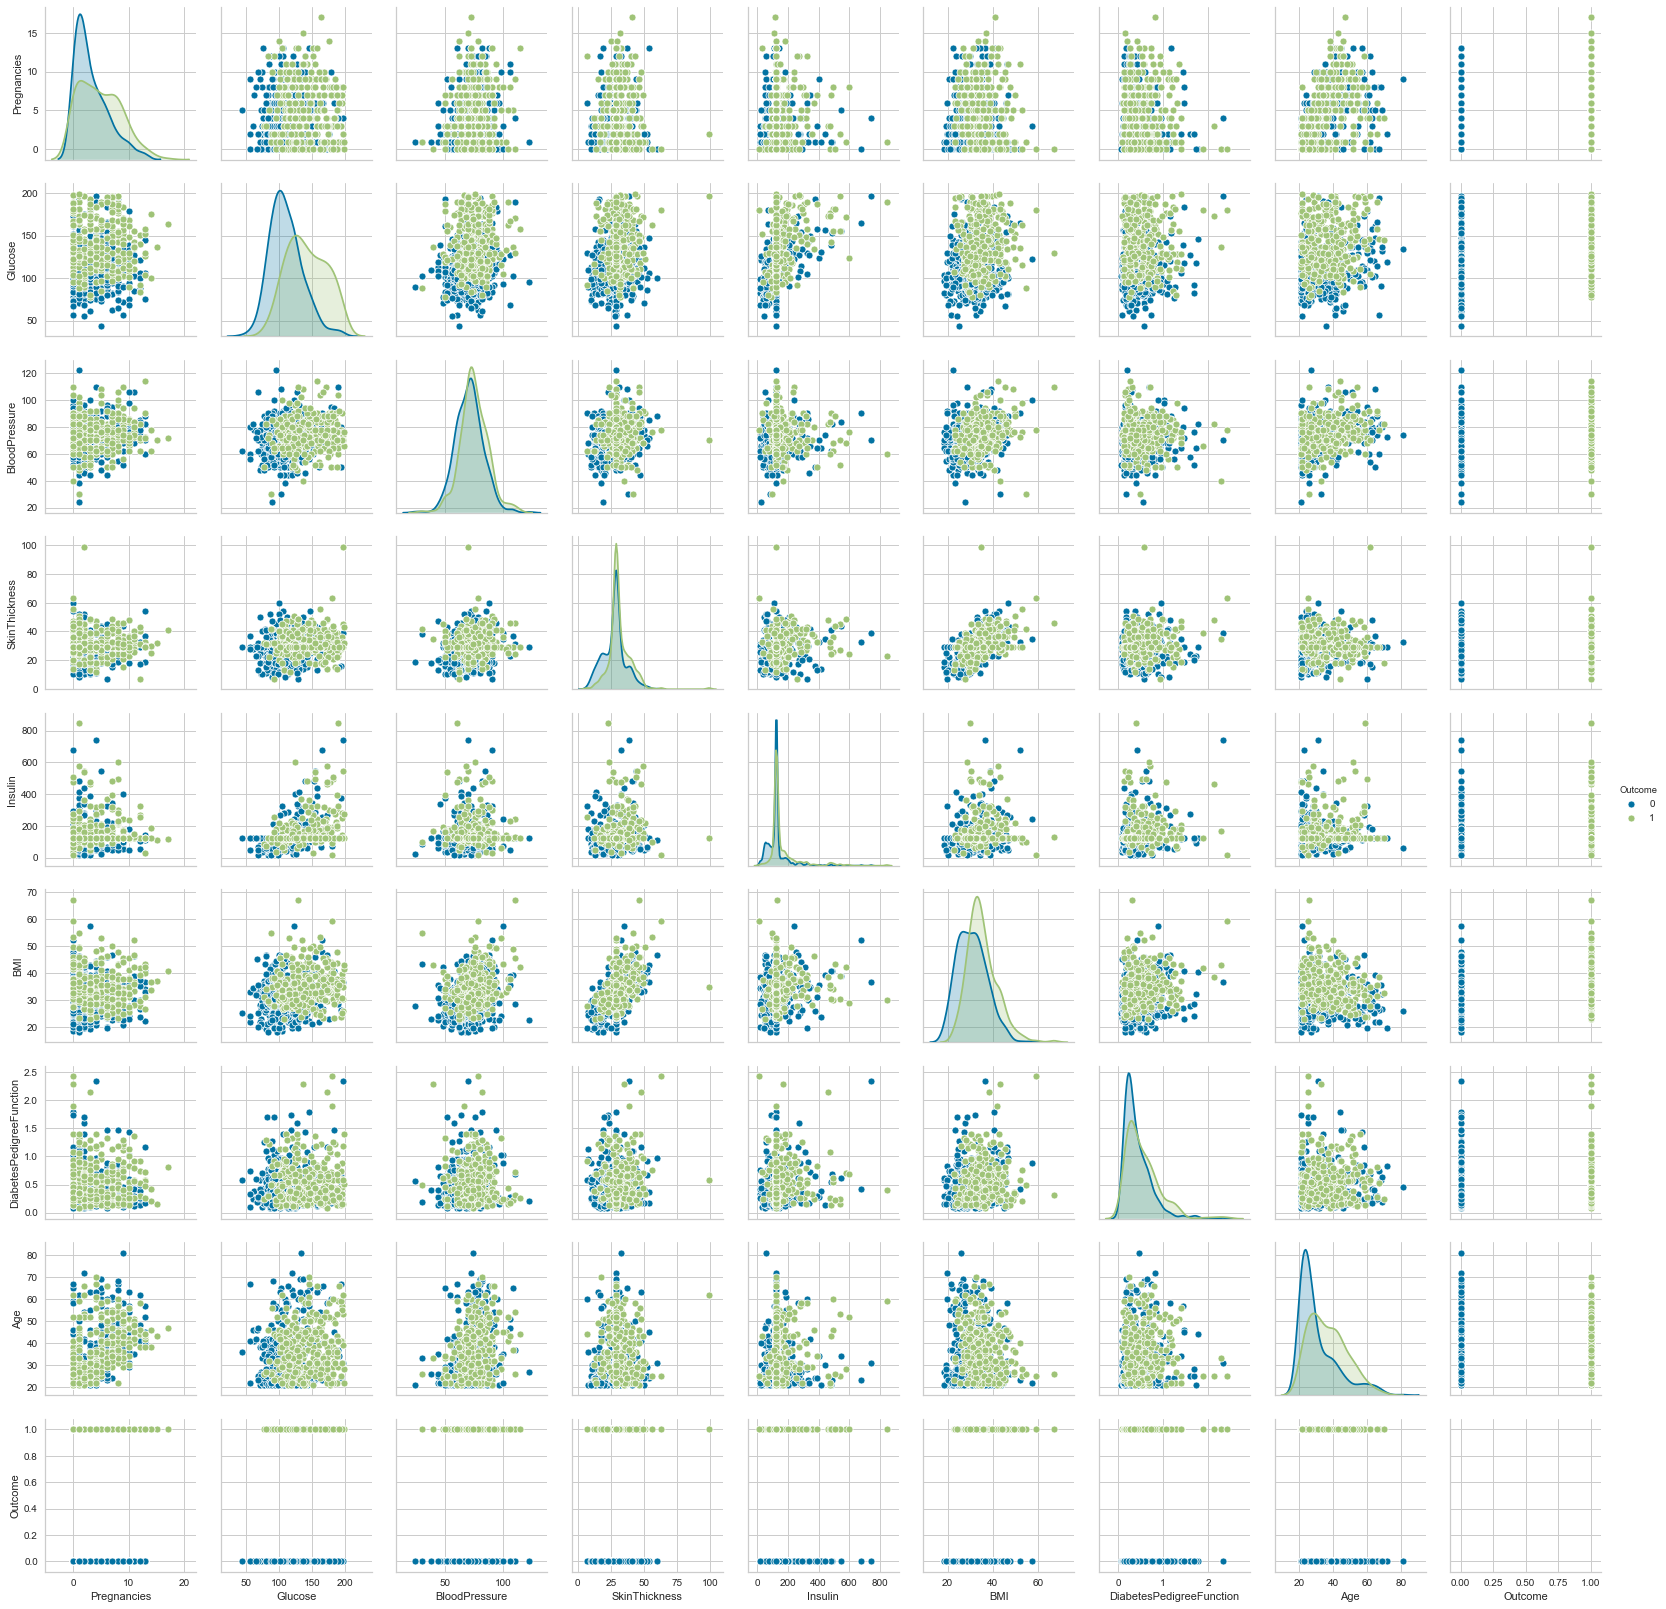

In [134]:
p=sns.pairplot(diabetes_data_copy.dropna(), hue = 'Outcome')

Let see the violinplot

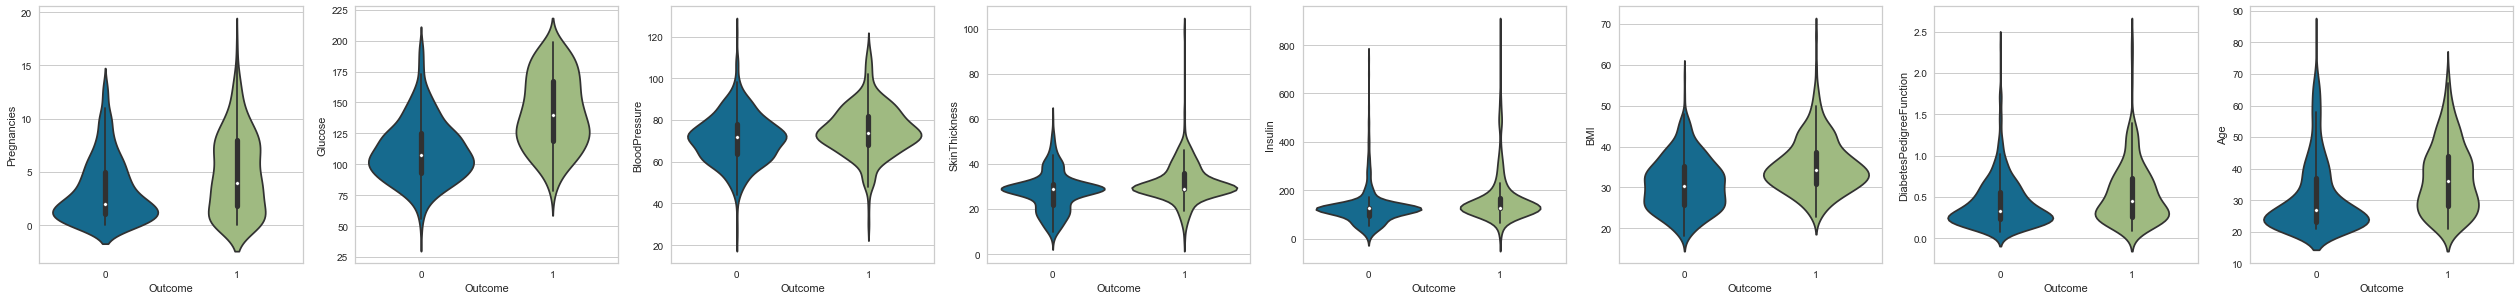

In [135]:
plt.figure(figsize=(50,50))
for column_index, column in enumerate(diabetes_data_copy.columns):
	if column == 'Outcome':
	    continue
	plt.subplot(9, 9, column_index + 1)
	sns.violinplot(x='Outcome', y=column, data=diabetes_data_copy)

## 4.4 A heat map 
heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

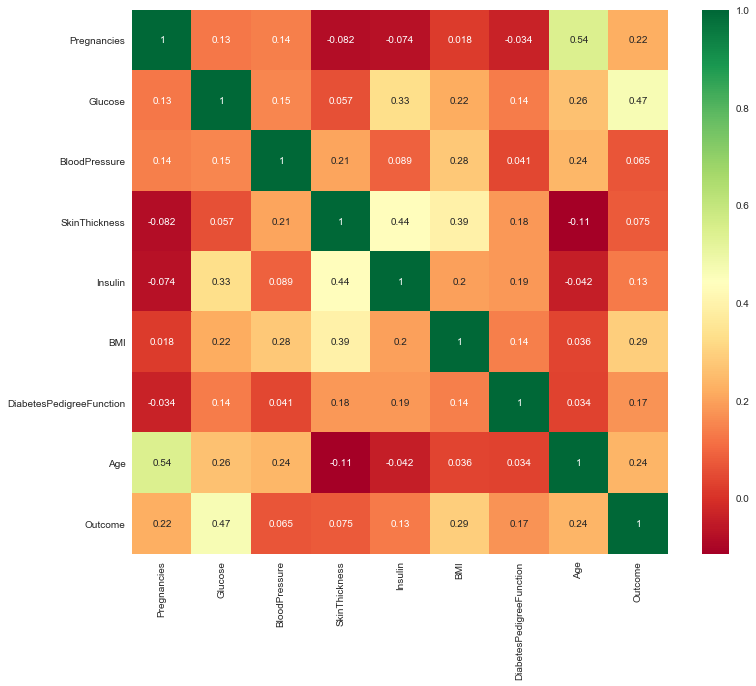

In [136]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## 4.5 Heatmap for clean data

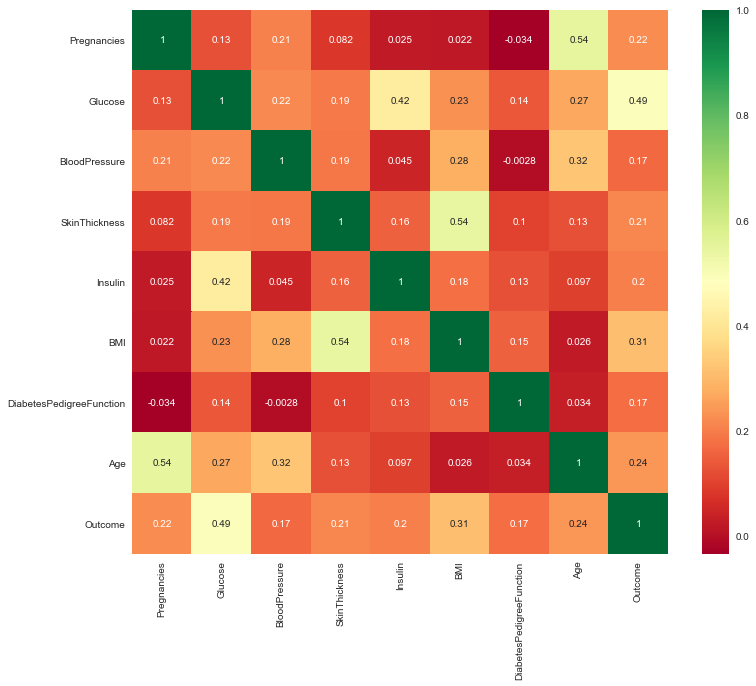

In [137]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## 4.6 Scaling the data to standard normal distribution

In [138]:
#sc_X = StandardScaler()
#X =  pandas.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
#        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [139]:
#X.head()

In [140]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

# 5. Evaluate some algorithms
 it is time to create some models 

## 5.1 Create a Validation Dataset
split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [141]:
# Split-out validation dataset

#X = array[:,0:4]
Y = diabetes_data_copy.Outcome
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


We now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

## 5.3 Build Models
Let’s evaluate 2 different algorithms:
-DTree
-K-Nearest Neighbors (KNN).

## 5.3.1 Let's first try KNN

Let's choose different K to see the error curve

('RMSE value for k= ', 1, 'is:', 0.5866479729410511)
('RMSE value for k= ', 2, 'is:', 0.5284134548067254)
('RMSE value for k= ', 3, 'is:', 0.5345224838248488)
('RMSE value for k= ', 4, 'is:', 0.5096471914376255)
('RMSE value for k= ', 5, 'is:', 0.5096471914376255)
('RMSE value for k= ', 6, 'is:', 0.496742636335202)
('RMSE value for k= ', 7, 'is:', 0.4767312946227962)
('RMSE value for k= ', 8, 'is:', 0.48349377841522817)
('RMSE value for k= ', 9, 'is:', 0.48349377841522817)
('RMSE value for k= ', 10, 'is:', 0.4767312946227962)
('RMSE value for k= ', 11, 'is:', 0.4767312946227962)
('RMSE value for k= ', 12, 'is:', 0.44866323818505716)
('RMSE value for k= ', 13, 'is:', 0.43394894666502914)
('RMSE value for k= ', 14, 'is:', 0.4629100498862757)
('RMSE value for k= ', 15, 'is:', 0.4413674147523748)
('RMSE value for k= ', 16, 'is:', 0.4767312946227962)
('RMSE value for k= ', 17, 'is:', 0.4558423058385518)
('RMSE value for k= ', 18, 'is:', 0.4698714938993648)
('RMSE value for k= ', 19, 'is:', 

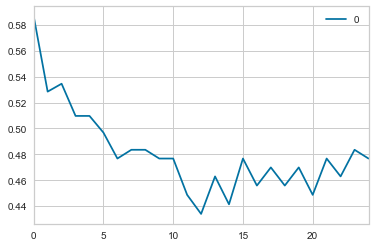

In [142]:
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_validation) #make prediction on test set
    error = sqrt(mean_squared_error(Y_validation,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pandas.DataFrame(rmse_val) #elbow curve 
curve.plot()

### Possiblely let choose K = 11？ to get better result

### let's draw the learn curve when K = 11

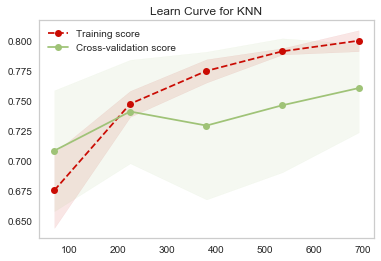

In [143]:
model1 = KNeighborsClassifier(n_neighbors=11)
model1.fit(X_train, Y_train)
score1 = model1.score(X_validation, Y_validation)

train_size, train_score, test_score = learning_curve(model1, X, Y, cv=10)

train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')

plt.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_size, train_scores_mean, 'o--', color='r', label="Training score")
plt.plot(train_size, test_scores_mean, 'o-', color='g', label="Cross-validation score")

plt.grid()
plt.title('Learn Curve for KNN')
plt.legend(loc="best")

### Let's try yellowbrick to draw the learning curve.

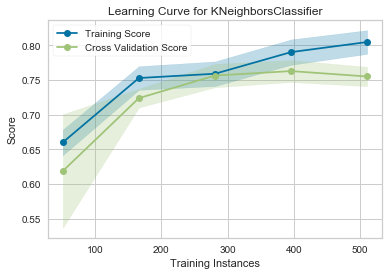

In [144]:
model2 = KNeighborsClassifier(n_neighbors=11)
model2.fit(X_train, Y_train) 
model3 = LearningCurve(model2)
model3.fit(X, y)
model3.poof()

### Validation curve by yellowbrick

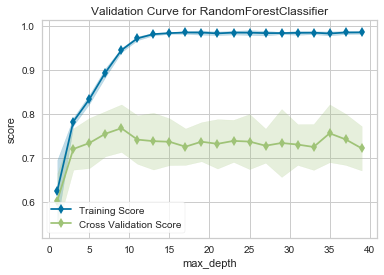

In [145]:
cv = StratifiedKFold(12)
param_range = np.arange(1, 40, 2)

oz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

oz.fit(X, y)
oz.poof()

### Now Our model using grid search will take in a kNN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [146]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. To do this, we will call ‘best_params_’ on our model.

In [147]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

### We can see that 14 is the optimal value for ‘n_neighbors’. We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [148]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.755700325732899

##  5.3.2  let's try RandomForestClassifier

In [149]:
# Choose the Random Forest classifier. 
clf = RandomForestClassifier()

# Choose some parameter 
#'n_estimators': [6, 8, 9], 
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)
#print grid_obj.best_estimator_

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, Y_train)

predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7402597402597403


C:\Users\610118\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 5.3.2 Test 
We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [150]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [151]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
#models.append(('KNN', knn()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('Random Forest', clf()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.745849 (0.052877)
CART: 0.679059 (0.036508)


In [152]:
import autosklearn.classification

ImportError: No module named autosklearn.classification

In [ ]:
cls = autosklearn.classification.AutoSklearnClassifier()

In [ ]:
cls.fit(X_train, Y_train)

In [ ]:
predictions = cls.predict(X_validation)

In [ ]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(Y_validation, predictions))